In [1]:
import numpy as np
import numpy.linalg as npl
import math
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 11.1 Left and Right Inverses 

In [2]:
A,B,C = np.array([[-3,-4],[4,6],[1,1]]), np.array([[-11,-10,16],[7,8,-11]])/9, np.array([[0,-1,6],[0,1,-4]])/2
A
B
C
np.matmul(B,A)
np.matmul(C,A) #both matrix multiplications yield identity matrices.

array([[-3, -4],
       [ 4,  6],
       [ 1,  1]])

array([[-1.22222222, -1.11111111,  1.77777778],
       [ 0.77777778,  0.88888889, -1.22222222]])

array([[ 0. , -0.5,  3. ],
       [ 0. ,  0.5, -2. ]])

array([[ 1.0000000e+00,  0.0000000e+00],
       [-4.4408921e-16,  1.0000000e+00]])

array([[1., 0.],
       [0., 1.]])

# 11.2 Inverse 

In [3]:
A = np.array([[1,-2,3],[0,2,2],[-4,-4,-4]])
B = npl.inv(A)
B
np.matmul(B,A)
np.matmul(A,B)

array([[-2.77555756e-17, -5.00000000e-01, -2.50000000e-01],
       [-2.00000000e-01,  2.00000000e-01, -5.00000000e-02],
       [ 2.00000000e-01,  3.00000000e-01,  5.00000000e-02]])

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 2.77555756e-17],
       [0.00000000e+00, 5.55111512e-17, 1.00000000e+00]])

array([[ 1.00000000e+00,  1.11022302e-16, -1.38777878e-17],
       [ 5.55111512e-17,  1.00000000e+00,  1.38777878e-17],
       [ 0.00000000e+00, -2.22044605e-16,  1.00000000e+00]])

In [4]:
A = np.array([[1,0,1],[4,-3,-4],[1,-1,-2]])
B = npl.inv(A)
A
B
x = np.array([.2,-.3,1.2])
rhs = (B[0,:] @ x) * A[:,0] + (B[1,:] @ x) * A[:,1] + (B[2,:] @ x) * A[:,2]
rhs

array([[ 1,  0,  1],
       [ 4, -3, -4],
       [ 1, -1, -2]])

array([[ 2., -1.,  3.],
       [ 4., -3.,  8.],
       [-1.,  1., -3.]])

array([ 0.2, -0.3,  1.2])

In [5]:
A = np.random.randn(3,3)
npl.inv(A)
Q,R = npl.qr(A)
npl.inv(R)*Q.transpose()

array([[-0.04018168,  0.97337829,  0.23246209],
       [-0.61021607, -1.1189262 , -0.51816061],
       [-0.72817915, -0.71779341,  0.59970098]])

array([[-0.39666307, -0.41117891,  0.12619405],
       [-0.        , -0.64038669, -0.64414981],
       [-0.        , -0.        ,  0.59970098]])

# 11.3 Solving Linear Equations

In [6]:
#back substitution
def backsub(R,b):
    n = len(b)
    x = np.zeros(n)
    for i in range(n-1,0,-1):
        x[i] = (b[i] - R[i][i+1:n] @ x[i+1:n])/R[i][i]
    return x

R = np.triu(np.random.randn(4,4))
b = np.random.rand(4)
x = backsub(R,b)

npl.norm(np.matmul(R,x-b))

3.681577879213111

In [7]:
n = 5000
A,b = np.random.randn(n,n), np.random.randn(n)
x1 = npl.solve(A,b)
x2 = np.matmul(npl.inv(A),b)

In [8]:
%timeit npl.solve(A,b) #x1
%timeit np.matmul(npl.inv(A),b) #x2

x1
x2
npl.norm(b-np.matmul(A,x1))
npl.norm(b-np.matmul(A,x2))

893 ms ± 49.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3 s ± 96.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


array([ 3.77287149,  3.15667035,  0.48419034, ..., -0.23690906,
        0.39133397, -1.20343637])

array([ 3.77287149,  3.15667035,  0.48419034, ..., -0.23690906,
        0.39133397, -1.20343637])

1.3461132596659248e-09

1.1933113026789023e-09

In [9]:
n=5000
A,b = np.random.randn(n,n), np.random.randn(n)
%timeit npl.solve(A,b)

n=10000
A,b = np.random.randn(n,n), np.random.randn(n)
%timeit npl.solve(A,b)

#shows n^2 complexity

877 ms ± 74.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.25 s ± 1.19 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
n = 5000
A,B = np.random.randn(n,n), np.random.randn(n,2)
%timeit npl.solve(A,B[:,0]) #two different RHS's
%timeit npl.solve(A,B[:,1])
%timeit [npl.solve(A,B[:,0]), npl.solve(A,B[:,1])] #naive solving takes twice as long as an individual solve
%timeit npl.solve(A,B) #factor solve takes roughly same time as one RHS

1.62 s ± 461 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
880 ms ± 63.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.78 s ± 112 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
913 ms ± 64.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# 11.4 Examples 

In [11]:
t = np.array([-1.1,-.4,.2,.8])
A = list(reversed(np.flip(np.vander(t,4)))) #vander constructed differently in numpy than in Julia
b1 = np.array([-1.,1.3,1.,.5])
c1 = npl.solve(A,b1)
b2 = np.array([1.,0.,-2.,0])
c2 = npl.solve(A,b2)
ts = np.linspace(-1.2,1.2,1000)
p1 = c1[0] + (c1[1]*ts) + (c1[2]*(ts**2))+ (c1[3]*(ts**3))
p2 = c2[0] + (c2[1]*ts) + (c2[2]*(ts**2))+ (c2[3]*(ts**3))

array([-1.71682411, -1.69820591, -1.67965802, -1.66118032, -1.6427727 ,
       -1.62443504, -1.60616723, -1.58796915, -1.56984069, -1.55178173,
       -1.53379216, -1.51587185, -1.4980207 , -1.4802386 , -1.46252541,
       -1.44488104, -1.42730536, -1.40979826, -1.39235962, -1.37498933,
       -1.35768727, -1.34045333, -1.32328739, -1.30618934, -1.28915906,
       -1.27219644, -1.25530135, -1.23847369, -1.22171334, -1.20502019,
       -1.18839411, -1.171835  , -1.15534274, -1.13891721, -1.1225583 ,
       -1.10626589, -1.09003986, -1.07388011, -1.05778652, -1.04175896,
       -1.02579734, -1.00990152, -0.9940714 , -0.97830685, -0.96260777,
       -0.94697404, -0.93140555, -0.91590217, -0.9004638 , -0.88509031,
       -0.86978159, -0.85453753, -0.83935802, -0.82424293, -0.80919215,
       -0.79420556, -0.77928306, -0.76442452, -0.74962983, -0.73489888,
       -0.72023154, -0.70562771, -0.69108726, -0.67661009, -0.66219607,
       -0.6478451 , -0.63355705, -0.61933182, -0.60516928, -0.59

array([ 6.11785875e-01,  6.23359869e-01,  6.34819155e-01,  6.46164040e-01,
        6.57394832e-01,  6.68511839e-01,  6.79515367e-01,  6.90405724e-01,
        7.01183218e-01,  7.11848156e-01,  7.22400845e-01,  7.32841593e-01,
        7.43170707e-01,  7.53388495e-01,  7.63495264e-01,  7.73491321e-01,
        7.83376974e-01,  7.93152530e-01,  8.02818297e-01,  8.12374582e-01,
        8.21821692e-01,  8.31159935e-01,  8.40389619e-01,  8.49511050e-01,
        8.58524536e-01,  8.67430385e-01,  8.76228904e-01,  8.84920400e-01,
        8.93505181e-01,  9.01983554e-01,  9.10355826e-01,  9.18622306e-01,
        9.26783300e-01,  9.34839115e-01,  9.42790060e-01,  9.50636442e-01,
        9.58378567e-01,  9.66016744e-01,  9.73551280e-01,  9.80982482e-01,
        9.88310658e-01,  9.95536115e-01,  1.00265916e+00,  1.00968010e+00,
        1.01659925e+00,  1.02341690e+00,  1.03013337e+00,  1.03674897e+00,
        1.04326401e+00,  1.04967878e+00,  1.05599360e+00,  1.06220877e+00,
        1.06832461e+00,  

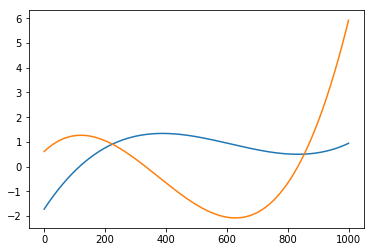

In [12]:
p1
p2
plt.plot(p1)
plt.plot(p2)

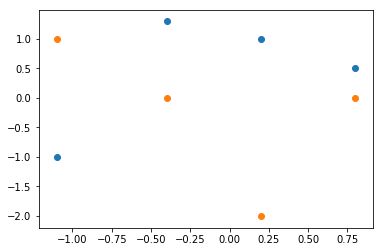

In [13]:
plt.scatter(t,b1)
plt.scatter(t,b2)
#Julia plot rescales both plots and scatters into one plot

# 11.5 Pseudo-inverse

In [14]:
A = np.matrix([[-3,-4],[4,6],[1,1]])
npl.pinv(A)
Q,R = npl.qr(A)
Q
R
npl.solve(R,Q.transpose())

matrix([[-1.22222222, -1.11111111,  1.77777778],
        [ 0.77777778,  0.88888889, -1.22222222]])

matrix([[-0.58834841, -0.45760432],
        [ 0.78446454, -0.52297636],
        [ 0.19611614,  0.7190925 ]])

matrix([[ 5.09901951,  7.256297  ],
        [ 0.        , -0.58834841]])

matrix([[-1.22222222, -1.11111111,  1.77777778],
        [ 0.77777778,  0.88888889, -1.22222222]])